In [1]:
import os
import pandas as pd

import matplotlib.pyplot as plt
from  matplotlib.ticker import FuncFormatter
import seaborn as sns; sns.set()

In [2]:
baseline_metrics = "./log_dir/baseline_1700486339.909711/"
ninety_rotation = "./log_dir/90_rotation_1700509435.178249/"
horizontal_flip = "./log_dir/horizontal_flip_1700507206.941485/"
random_crop = "./log_dir/random_crop_1700594571.537623/"

In [8]:
# Baseline Metrics
baseline_training_metrics = pd.read_csv(os.path.join(baseline_metrics, "training_metrics.csv"))
baseline_test_metrics = pd.read_csv(os.path.join(baseline_metrics, "test_metrics.csv"))

# 90 degree Rotation
ninety_rotation_training_metrics = pd.read_csv(os.path.join(ninety_rotation, "training_metrics.csv"))
ninety_rotation_test_metrics = pd.read_csv(os.path.join(ninety_rotation, "test_metrics.csv"))

# Horizontal Flip
horizontal_flip_training_metrics = pd.read_csv(os.path.join(horizontal_flip, "training_metrics.csv"))
horizontal_flip_test_metrics = pd.read_csv(os.path.join(horizontal_flip, "test_metrics.csv"))

# Random Crop
random_crop_training_metrics = pd.read_csv(os.path.join(random_crop, "training_metrics.csv"))
random_crop_test_metrics = pd.read_csv(os.path.join(random_crop, "test_metrics.csv"))

#### Visualization of the Training Loss

In [4]:
loss_metrics = zip([int(idx) for idx in range(20)],
                   list(baseline_training_metrics["loss"]), 
                   list(ninety_rotation_training_metrics["loss"]), 
                   list(horizontal_flip_training_metrics["loss"]), 
                   list(random_crop_training_metrics["loss"]))

In [5]:
loss_metrics_df = pd.DataFrame(loss_metrics, 
                               columns=["epoch", "without_augmentation", "rotation", "horizontal_flip", "random_crop"])

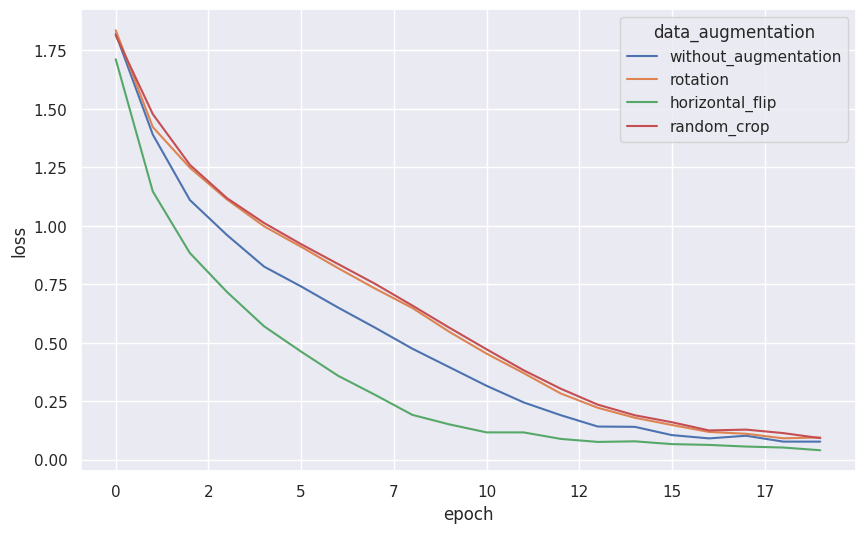

In [7]:
unpivot_df = pd.melt(loss_metrics_df, ["epoch"])
unpivot_df = unpivot_df.rename(columns={"variable": "data_augmentation", "value": "loss"})

plt.figure(figsize=(10,6))
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: int(x)))
sns.lineplot(data=unpivot_df, x="epoch", y="loss", hue="data_augmentation")
plt.savefig("screenshots/loss_graph.png")

#### Visualization of Test Accuracy

In [10]:
test_acc_metrics = zip(list(baseline_test_metrics["accuracy"]), 
                       list(ninety_rotation_test_metrics["accuracy"]), 
                       list(horizontal_flip_test_metrics["accuracy"]), 
                       list(random_crop_test_metrics["accuracy"]))
test_acc_df = pd.DataFrame(test_acc_metrics, columns=["without_augmentation", "rotation", "horizontal_flip", "random_crop"])

In [11]:
test_acc_df

,without_augmentation,rotation,horizontal_flip,random_crop
0,73,76,88,76


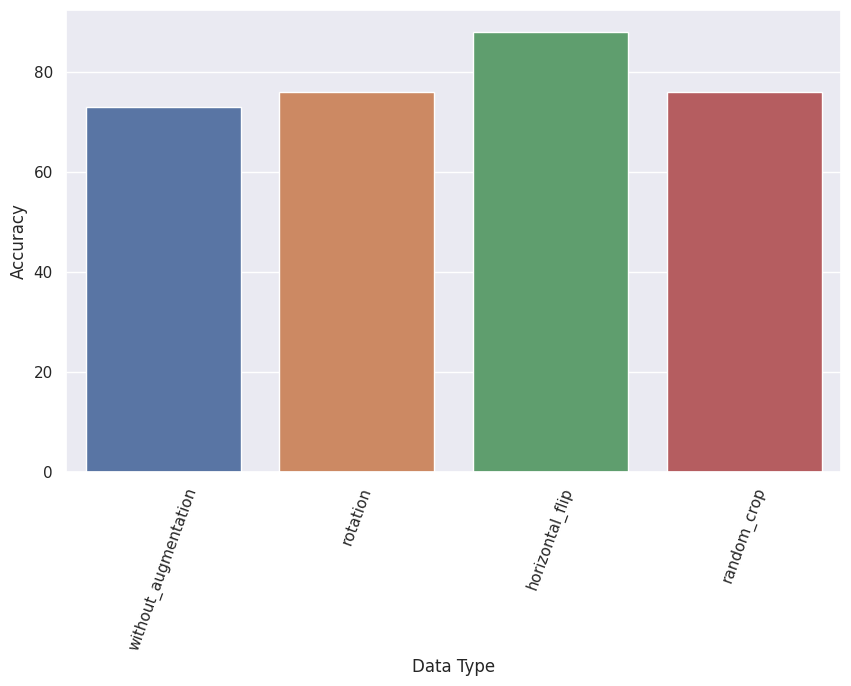

In [17]:
plt.figure(figsize=(10,6))
ax = sns.barplot(test_acc_df)
ax.set(xlabel='Data Type', ylabel='Accuracy')
plt.xticks(rotation=70)
plt.savefig("screenshots/accuracy_graph.png", bbox_inches='tight')